In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Second Chance,1950
1,One Exciting Week,1946
2,Flowers (IV),2011
3,Stuntman,1968
4,Kaki kuda,1958


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [17]:
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
The Three Musketeers    11
Freedom                 11
Temptation              11
Maya                    11
Othello                 11
Anna                    10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [18]:
titles[titles.year//10==193].year.value_counts().head(3)

1937    1217
1938    1161
1936    1153
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

<AxesSubplot:>

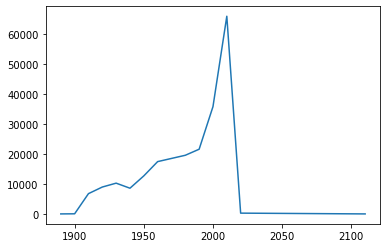

In [33]:
((titles.year//10) * 10).value_counts().sort_index().plot()

<AxesSubplot:>

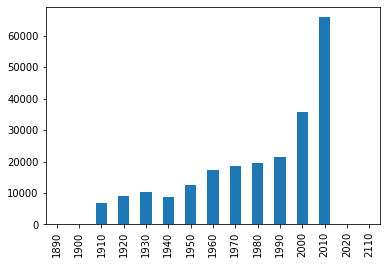

In [34]:
((titles.year//10)*10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

<AxesSubplot:>

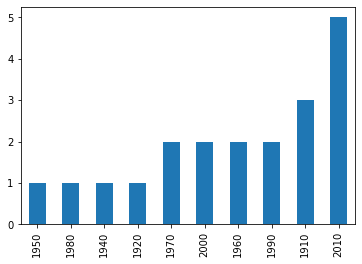

In [60]:
((titles.year//10)*10)[titles.title=="Hamlet"].value_counts().sort_values().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

<AxesSubplot:>

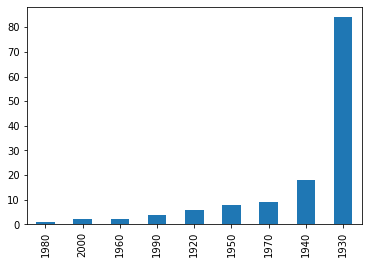

In [62]:
((cast.year//10)*10)[cast.character=="Rustler"].value_counts().sort_values().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

<AxesSubplot:>

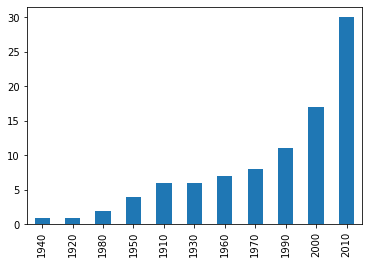

In [63]:
((cast.year//10)*10)[cast.character=="Hamlet"].value_counts().sort_values().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [68]:
cast.character.value_counts().head(11)

Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Minor Role      6203
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [72]:
cast[cast.character=="Herself"].name.value_counts().head(10)

Queen Elizabeth II           11
María Luisa (V) Martín        9
Luisa Horga                   9
Hillary Clinton               8
Margaret Thatcher             8
Joyce Brothers                8
Marta Berrocal                6
Marilyn Monroe                6
Joan Rivers                   6
María Isabel (III) Martín     6
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [73]:
cast[cast.character=="Himself"].name.value_counts().head(10)

Adolf Hitler             91
Richard Nixon            43
Ronald Reagan            37
John F. Kennedy          35
Winston Churchill        24
George W. Bush           24
Martin Luther King       23
Bill Clinton             22
Benito Mussolini         21
Franklin D. Roosevelt    20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [79]:
cast[(cast.year==1945) & ((cast.type=='actor') | (cast.type=='actress'))].name.value_counts().head()

Emmett Vogan       37
Sam (II) Harris    31
Bess Flowers       28
Harold Miller      28
Franklyn Farnum    27
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [80]:
cast[(cast.year==1985) & ((cast.type=='actor') | (cast.type=='actress'))].name.value_counts().head()

Mammootty        22
Sukumari         20
Shakti Kapoor    19
Raj Babbar       15
Mohanlal         15
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

<AxesSubplot:>

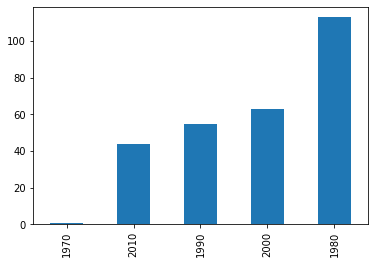

In [83]:
((cast[cast.name=="Mammootty"].year//10) * 10).value_counts().sort_values().plot(kind='bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [86]:
cast[(cast.character).str.startswith("Patron in")].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       8
Patron in Billiard Parlor        5
Patron in restaurant             3
Patron in Bar                    3
Patron in Restaurant             3
Patron in Club                   3
Patron in cabaret                3
Patron in Audience               2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [87]:
cast[(cast.character).str.startswith("Science")].character.value_counts().head(10)

Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Reporter         5
Science Fair Kid         5
Science Kid              5
Science                  4
Science teacher          3
Science Officer          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

<AxesSubplot:xlabel='year', ylabel='n'>

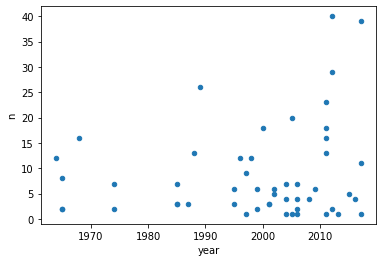

In [98]:
cast[(cast.name=="Judi Dench") & (cast.n.notnull())].plot(x="year", y="n", kind="scatter")

### Plot the n-values of Cary Grant's roles through his career.

<AxesSubplot:xlabel='year', ylabel='n'>

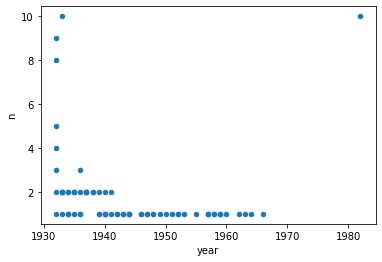

In [99]:
cast[(cast.name=="Cary Grant") & (cast.n.notnull())].plot(x="year", y="n", kind="scatter")

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

<AxesSubplot:xlabel='year', ylabel='n'>

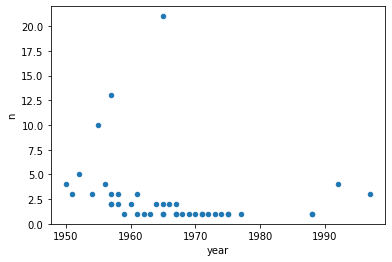

In [100]:
cast[(cast.name=="Sidney Poitier") & (cast.n.notnull())].plot(x="year", y="n", kind="scatter")

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [103]:
len(cast[(cast.n==1) & (cast.year//10==195)])

9467

In [104]:
len(cast[(cast.n==1) & (cast.year//10==195) & ((cast.type=="actor") | (cast.type=="actress"))])

9467

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [105]:
len(cast[(cast.n==2) & (cast.year//10==195)])

9016